In [ ]:
!pip install scikit-learn pandas matplotlib seaborn --quiet

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Crop_recommendation.csv')
df.head()


Saving Crop_recommendation.csv to Crop_recommendation (1).csv


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


from matplotlib import pyplot as plt
_df_0['N'].plot(kind='hist', bins=20, title='N')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['P'].plot(kind='hist', bins=20, title='P')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['K'].plot(kind='hist', bins=20, title='K')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['temperature'].plot(kind='hist', bins=20, title='temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='N', y='P', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='P', y='K', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='K', y='temperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='temperature', y='humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['N'].plot(kind='line', figsize=(8, 4), title='N')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['P'].plot(kind='line', figsize=(8, 4), title='P')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['K'].plot(kind='line', figsize=(8, 4), title='K')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['temperature'].plot(kind='line', figsize=(8, 4), title='temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


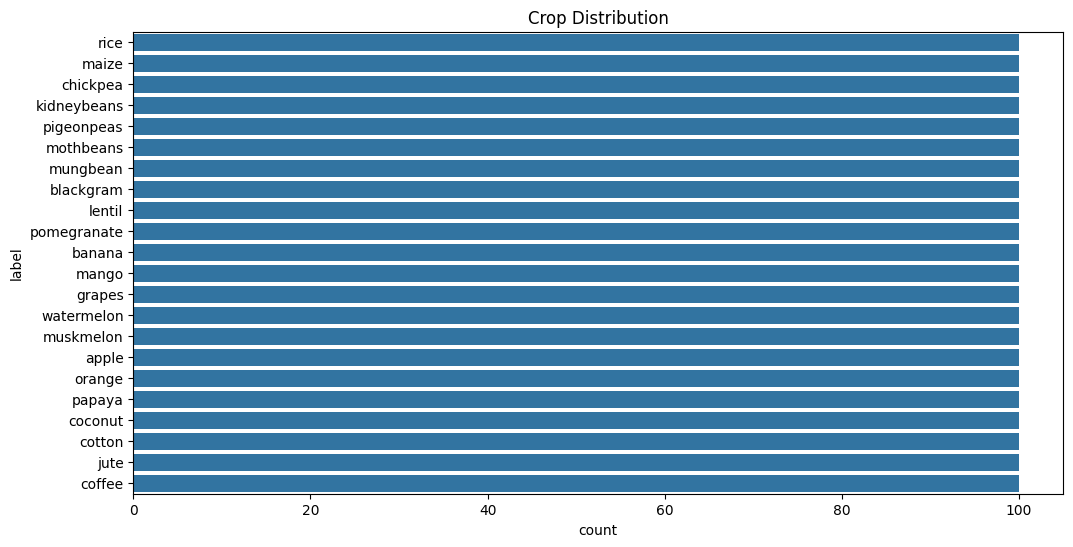

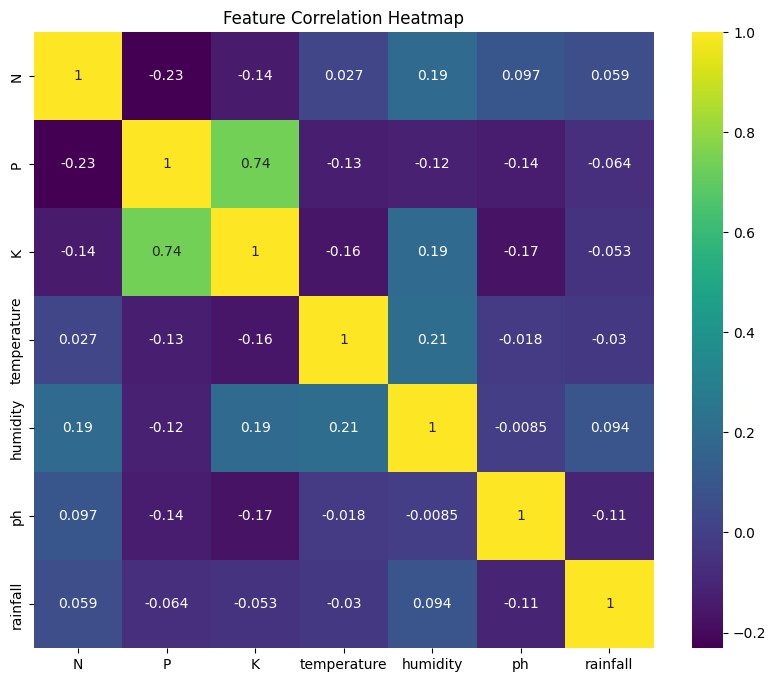

In [ ]:
df.info()
df.describe()
plt.figure(figsize=(12,6))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index)
plt.title('Crop Distribution')
plt.show()
plt.figure(figsize=(10,8))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap='viridis')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop('label', axis=1)
y = df['label']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': [3,5,7,9]}
grid_knn = GridSearchCV(knn, params_knn, cv=5)
grid_knn.fit(X_train, y_train)
print("KNN Accuracy:", grid_knn.score(X_test, y_test))
svm = SVC()
params_svm = {'kernel': ['linear', 'rbf', 'poly'], 'C': [1, 10]}
grid_svm = GridSearchCV(svm, params_svm, cv=5)
grid_svm.fit(X_train, y_train)
print("SVM Accuracy:", grid_svm.score(X_test, y_test))
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt.predict(X_test)))
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))
gbt = GradientBoostingClassifier()
gbt.fit(X_train, y_train)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gbt.predict(X_test)))

KNN Accuracy: 0.9704545454545455
SVM Accuracy: 0.9772727272727273
Decision Tree Accuracy: 0.9840909090909091
Random Forest Accuracy: 0.9181818181818182
Gradient Boosting Accuracy: 0.9818181818181818


Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.56      1.00      0.71        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.80      0.94      0.86        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.85      0.74      0.79        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.55      1.00      0.71        11
       maize       0.95      1.00      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.25      0.40        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
   

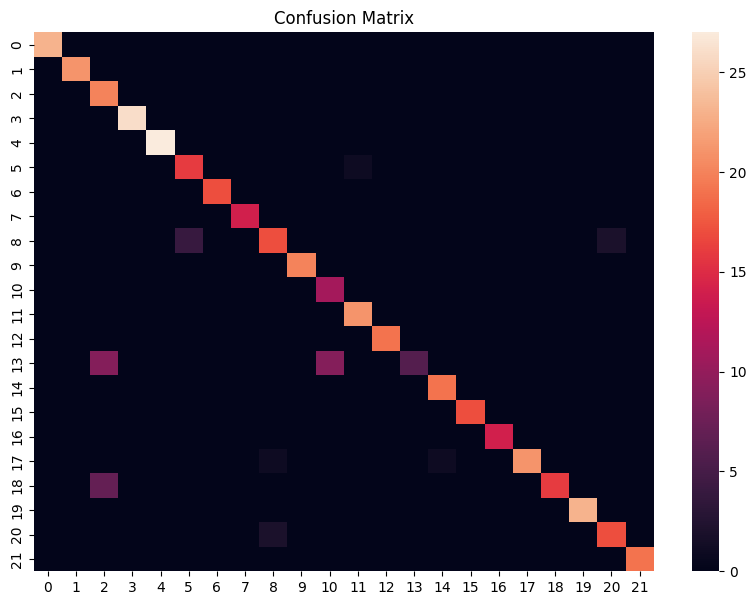

In [ ]:
y_pred = rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=False)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
sample_input = np.array([[90, 42, 43, 20.5, 80, 6.5, 100]])
sample_input_scaled = scaler.transform(sample_input)
print("Predicted Crop:", rf.predict(sample_input_scaled)[0])

Predicted Crop: rice


In [ ]:
import joblib
joblib.dump(rf, 'crop_recommendation_model.pkl')


['crop_recommendation_model.pkl']